In [1]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

WV WIA
GOVERNMENT OF INDIA

 

Adeld AMA
Navneet Nayal
DOB: 06-10-1997
Gender:Male

  

4726 7299 0081


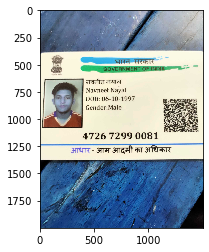

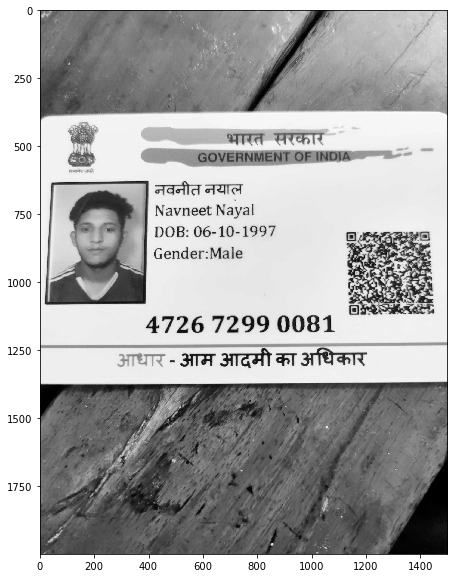

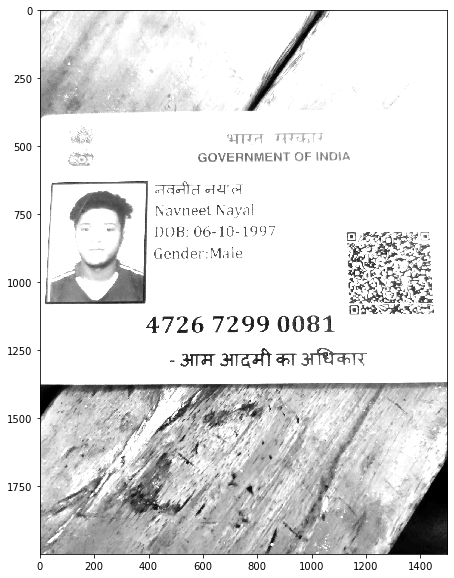

In [79]:
img = cv2.imread("ac_test.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
display(threshed)
text1 = pytesseract.image_to_data(threshed, lang="eng",output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="eng")
print(text2)
text = text1[text1.conf > 80]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

In [80]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', text.shape[0]+1)

In [81]:
print("text1 : \n")
print(text1,"\n\n")

print("text : \n")
print(text, "\n\n")
  
print("lines : \n")
for i in range(len(lines)):
  print("level", i, ": ", lines.iloc[i])

print("\n\n conf : \n")
print(conf)

text1 : 

    level  page_num  block_num  par_num  line_num  word_num  left   top  \
0       1         1          0        0         0         0     0     0   
1       2         1          1        0         0         0   749     0   
2       3         1          1        1         0         0   749     0   
3       4         1          1        1         1         0   749     0   
4       5         1          1        1         1         1   749     0   
..    ...       ...        ...      ...       ...       ...   ...   ...   
40      5         1          6        1         1         3   874  1123   
41      2         1          7        0         0         0     0  1237   
42      3         1          7        1         0         0     0  1237   
43      4         1          7        1         1         0     0  1237   
44      5         1          7        1         1         1     0  1237   

    width  height  conf  text  
0    1500    2000    -1   NaN  
1     320     376    -1  

In [82]:
from pytesseract import Output

img = cv2.imread('test2_ac.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


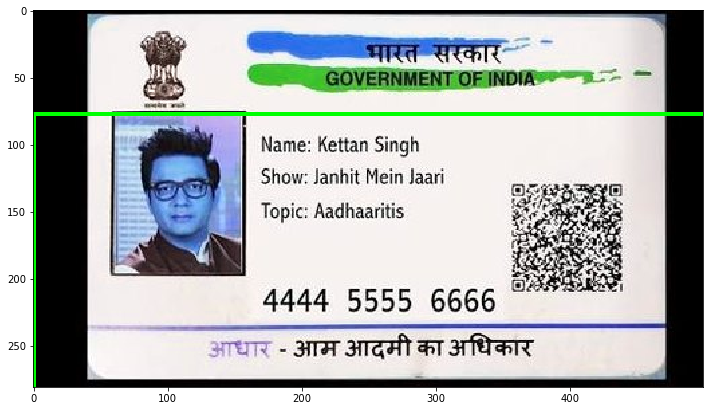

In [83]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

In [84]:
print(text)

    level  page_num  block_num  par_num  line_num  word_num  left   top  \
4       5         1          1        1         1         1   749     0   
11      5         1          2        1         2         1   582   523   
12      5         1          2        1         2         2   936   522   
13      5         1          2        1         2         3  1016   522   
17      5         1          3        1         1         1   424   642   
24      5         1          4        1         2         1   425   718   
25      5         1          4        1         2         2   649   714   
27      5         1          4        1         3         1   423   796   
28      5         1          4        1         3         2   567   793   
30      5         1          4        1         4         1   420   872   
34      5         1          5        1         1         1     0    77   
38      5         1          6        1         1         1   390  1126   
39      5         1      

In [85]:
int("".join(lines[len(lines)-1]))

472672990081